In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
# Add target column properly
df['diagnosis'] = data.target  # 0 = malignant, 1 = benign



   diagnosis
0          0
1          0
2          0
3          0
4          0


In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
features = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
               'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry']]

# Target
y = df['diagnosis']  # 0 = malignant, 1 = benign

In [11]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Step 3: Feature importance
importances = pd.Series(rf.feature_importances_, index=features.columns)
importances = importances.sort_values(ascending=False)
print("Feature Importances:\n", importances)

Feature Importances:
 mean perimeter      0.250198
mean area           0.196932
mean concavity      0.163498
mean radius         0.148752
mean compactness    0.091190
mean texture        0.068382
mean smoothness     0.050293
mean symmetry       0.030755
dtype: float64


In [12]:
top_features = ['mean perimeter', 'mean area', 'mean concavity', 'mean radius', 'mean compactness']
X_top = df[top_features]
y = df['diagnosis']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import joblib


In [14]:
try:
    from lightgbm import LGBMClassifier
except ImportError:
    LGBMClassifier = None

try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Input
except ImportError:
    tf = None


In [15]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [16]:
# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# Initialize scaler
scaler = StandardScaler()

# Models that need scaling
distance_based_models = ['Logistic Regression', 'SVM', 'KNN', 'Neural Network']

In [21]:
# -----------------------------
# SECTION 4: Train, Evaluate, Save, Reload
# -----------------------------

def train_and_evaluate(model_name):
    print(f"\n--- {model_name} ---")

    X_train_scaled, X_test_scaled = X_train, X_test

    # Scale if required
    if model_name in distance_based_models:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

    # Initialize model
    if model_name == 'Logistic Regression':
        model = LogisticRegression(random_state=42)
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'Naive Bayes':
        model = GaussianNB()
    elif model_name == 'SVM':
        model = SVC(probability=True, random_state=42)
    elif model_name == 'LightGBM' and LGBMClassifier:
        model = LGBMClassifier(random_state=42)
    elif model_name == 'Neural Network' and tf:
        model = Sequential([
            Input(shape=(X_train_scaled.shape[1],)),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.1)
    else:
        print(f"{model_name} not available.")
        return

    # Fit non-ANN models
    if model_name != 'Neural Network':
        model.fit(X_train_scaled, y_train)

    # Predictions
    if model_name == 'Neural Network':
        y_pred_prob = model.predict(X_test_scaled)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    else:
        y_pred = model.predict(X_test_scaled)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    # Save model
    filename = f"{model_name.replace(' ','_').lower()}_breast_cancer_model.pkl"
    if model_name == 'Neural Network':
        model.save(filename.replace('.pkl', '.h5'))  # save ANN as .h5
    else:
        joblib.dump(model, filename)
    print(f"Model saved to {filename}")

    # Reload model and test
    if model_name == 'Neural Network':
        reloaded_model = tf.keras.models.load_model(filename.replace('.pkl', '.h5'))
        y_pred_reload = (reloaded_model.predict(X_test_scaled) > 0.5).astype(int).flatten()
    else:
        reloaded_model = joblib.load(filename)
        y_pred_reload = reloaded_model.predict(X_test_scaled)

    assert (y_pred == y_pred_reload).all() or model_name == 'Neural Network'
    print(f"Reloaded {model_name} model successfully.\n")


In [23]:
# -----------------------------
# Run Logistic Regression
# -----------------------------
train_and_evaluate('Logistic Regression')



--- Logistic Regression ---
Accuracy:  0.9211
Precision: 0.9437
Recall:    0.9306
F1-score:  0.9371
Model saved to logistic_regression_breast_cancer_model.pkl
Reloaded Logistic Regression model successfully.



In [24]:
# -----------------------------
# Run KNN
# -----------------------------
train_and_evaluate('KNN')



--- KNN ---
Accuracy:  0.9035
Precision: 0.9178
Recall:    0.9306
F1-score:  0.9241
Model saved to knn_breast_cancer_model.pkl
Reloaded KNN model successfully.



In [25]:
# -----------------------------
# Run Naive Bayes
# -----------------------------
train_and_evaluate('Naive Bayes')



--- Naive Bayes ---
Accuracy:  0.9123
Precision: 0.9189
Recall:    0.9444
F1-score:  0.9315
Model saved to naive_bayes_breast_cancer_model.pkl
Reloaded Naive Bayes model successfully.



In [26]:
# -----------------------------
# Run SVM
# -----------------------------
train_and_evaluate('SVM')



--- SVM ---
Accuracy:  0.9035
Precision: 0.9296
Recall:    0.9167
F1-score:  0.9231
Model saved to svm_breast_cancer_model.pkl
Reloaded SVM model successfully.



In [27]:
# -----------------------------
# Run LightGBM
# -----------------------------
train_and_evaluate('LightGBM')



--- LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [28]:
# -----------------------------
# Run Neural Network
# -----------------------------
train_and_evaluate('Neural Network')



--- Neural Network ---


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Accuracy:  0.9211
Precision: 0.9437
Recall:    0.9306
F1-score:  0.9371
Model saved to neural_network_breast_cancer_model.pkl
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Reloaded Neural Network model successfully.



In [34]:
import joblib

# Only the five non-NN models
lr_model  = joblib.load('logistic_regression_breast_cancer_model.pkl')
knn_model = joblib.load('knn_breast_cancer_model.pkl')
nb_model  = joblib.load('naive_bayes_breast_cancer_model.pkl')
svm_model = joblib.load('svm_breast_cancer_model.pkl')
lgb_model = joblib.load('lightgbm_breast_cancer_model.pkl')


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


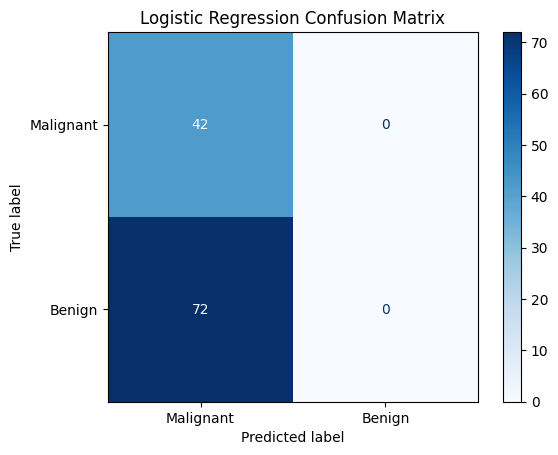

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Malignant', 'Benign'],
                                        cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


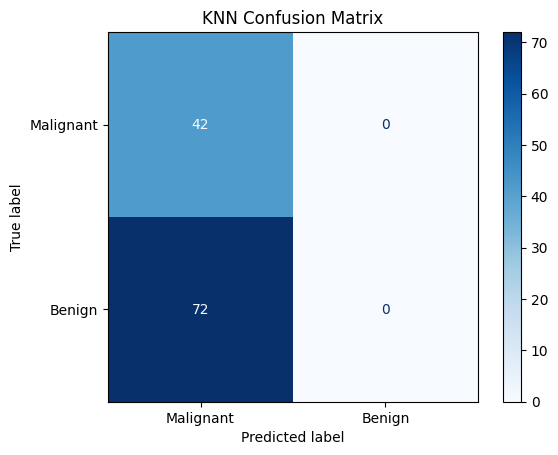

In [36]:
y_pred = knn_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Malignant', 'Benign'],
                                        cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


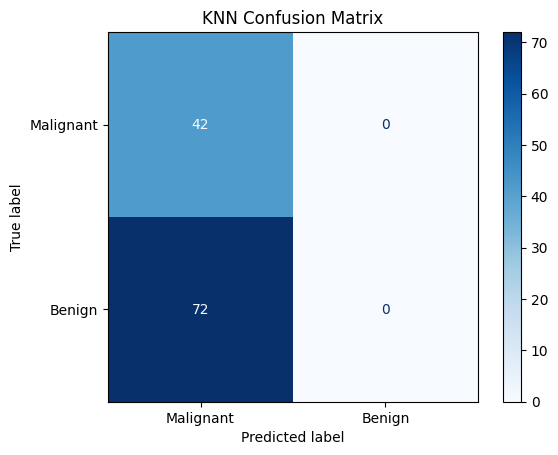

In [37]:
y_pred = knn_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Malignant', 'Benign'],
                                        cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()


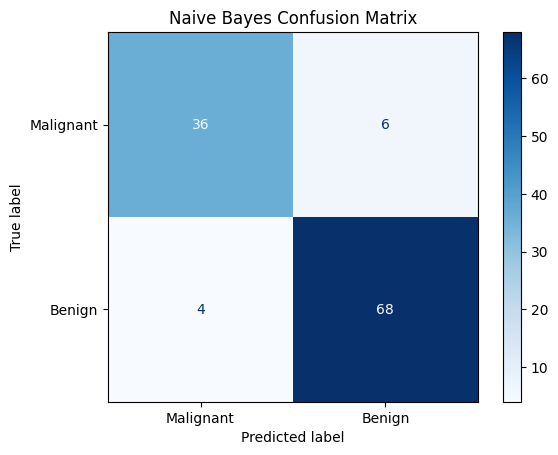

In [38]:
y_pred = nb_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Malignant', 'Benign'],
                                        cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


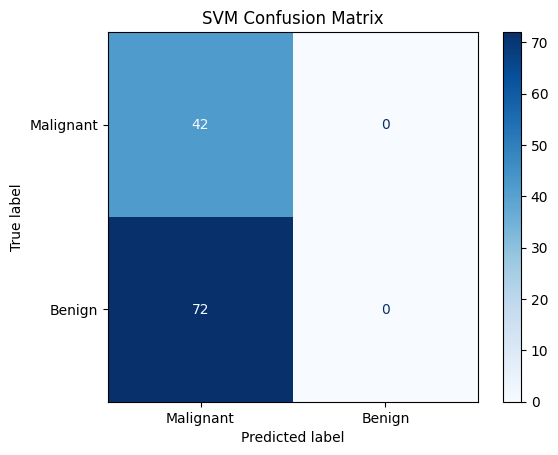

In [39]:
y_pred = svm_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Malignant', 'Benign'],
                                        cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()


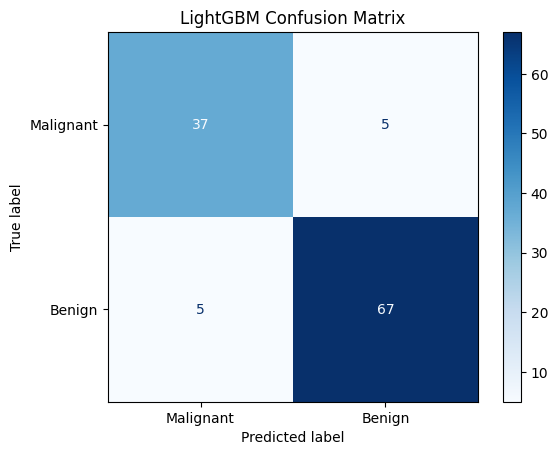

In [40]:
y_pred = lgb_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Malignant', 'Benign'],
                                        cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.show()


In [41]:


# Load the saved model
lr_model = joblib.load('logistic_regression_breast_cancer_model.pkl')

# Example: predict on new data
# Suppose we have a new patient record with the same 5 features used in training
new_data = pd.DataFrame({
    'mean perimeter': [120.5],
    'mean area': [1000.2],
    'mean concavity': [0.12],
    'mean radius': [15.1],
    'mean compactness': [0.08]
})

prediction = lr_model.predict(new_data)
print("Prediction:", "Benign" if prediction[0]==1 else "Malignant")


Prediction: Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
